# PCA through Singular Value Decomposition

In [ ]:
import numpy as np

# Defined 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X)

# Calculate the SVD decomposition and new basis vectors:
U, D, V = np.linalg.svd(R)  # Call SVD decomposition

# New basis vectors
u1 = U[:, 0]
u2 = U[:, 1]

# Calculate the coordinates in the new orthonormal basis:
X_transformed = np.dot(U.T, X)

# Calculate the approximation of the original from new basis
#print(Xi1[:,None]) # add second dimention to array and test it
X_approx = np.dot(U, X_transformed)

# Check that you got the original
print("Original matrix:\n", X)
print("Transformed matrix:\n", X_transformed)
print("Approximated matrix:\n", X_approx)


Original matrix:
 [[2 1 0]
 [4 3 0]]
Transformed matrix:
 [[-4.47066848 -3.14092366  0.        ]
 [-0.11455726  0.36687677  0.        ]]
Approximated matrix:
 [[2. 1. 0.]
 [4. 3. 0.]]


# PCA on Iris data

In [ ]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

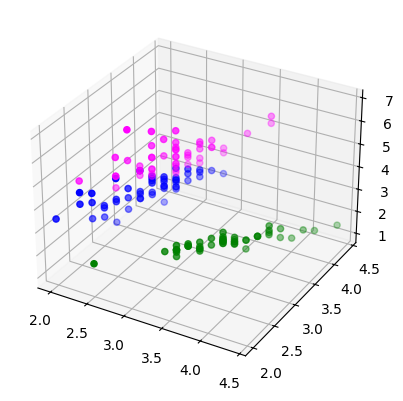

In [ ]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


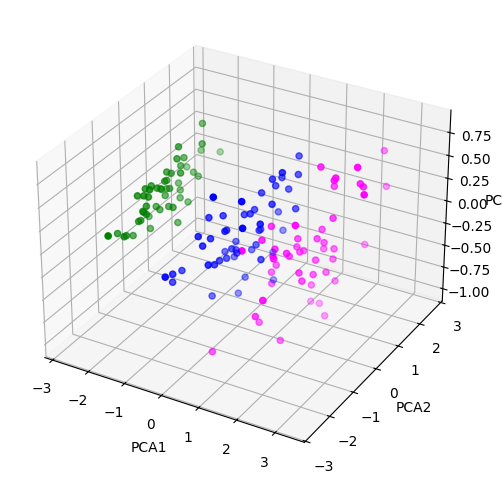

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the dataset
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Apply PCA with 3 components
pca = PCA(n_components=3)
Xpca = pca.fit_transform(Xpp)

# 3D Scatter Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['green', 'blue', 'magenta']

# Plot PCA transformed data for each class
for i in range(3):
    ax.scatter(Xpca[y == i, 0], Xpca[y == i, 1], Xpca[y == i, 2],
               color=colors[i], label=labels[i])

ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.show()


In [ ]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

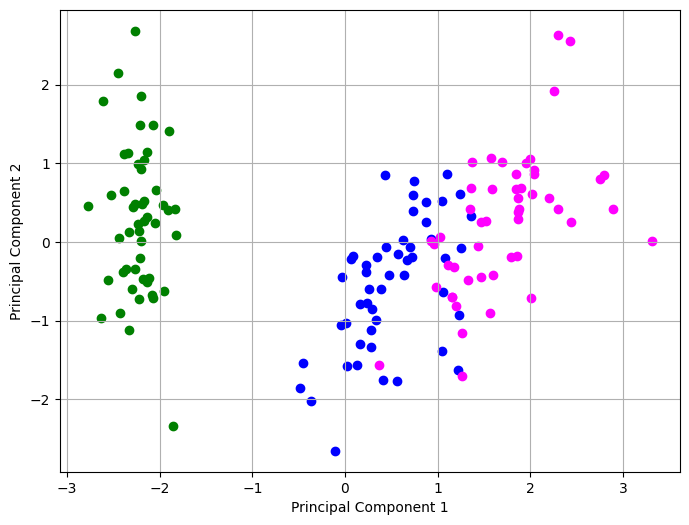

In [ ]:
# Plot the principal components in 2D, mark different targets in color

# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
Xpca_2d = pca_2d.fit_transform(Xpp)

# Plot the 2D PCA results
plt.figure(figsize=(8, 6))
colors = ['green', 'blue', 'magenta']

for i in range(3):
    plt.scatter(Xpca_2d[y == i, 0], Xpca_2d[y == i, 1], color=colors[i], label=labels[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


# KNN classifier

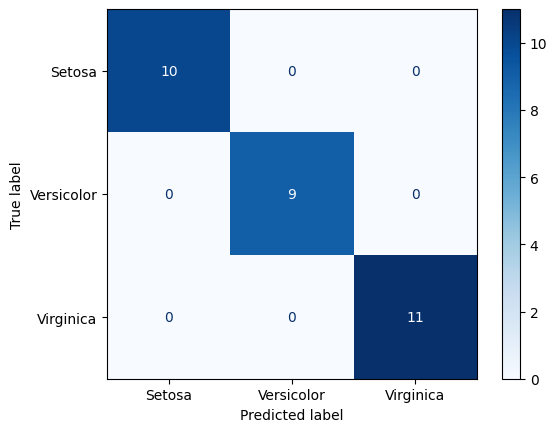

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])

disp.plot(cmap='Blues')
plt.show()



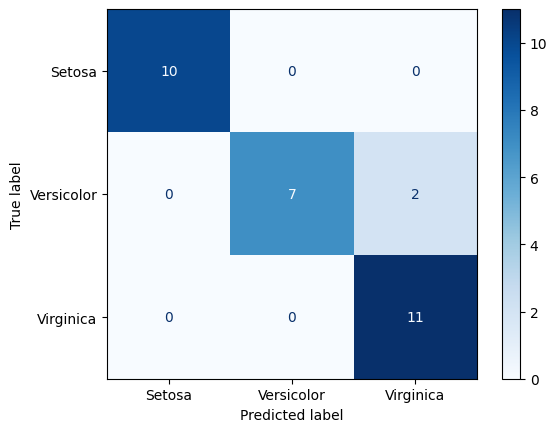

KNN Accuracy on Full Dataset: 1.00
KNN Accuracy on PCA-Reduced Dataset: 0.93


In [ ]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).

# Apply PCA with 2 components
pca_2d = PCA(n_components=2)
Xpca_2d = pca_2d.fit_transform(Xpp)

# Split dataset into training and testing
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(Xpca_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train_pca)

# Predict on test set
y_pred_pca = knn_pca.predict(X_test_pca)

# Compute and display confusion matrix
cm_pca = confusion_matrix(y_test_pca, y_pred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=['Setosa', 'Versicolor', 'Virginica'])

# Show confusion matrix
disp_pca.plot(cmap='Blues')
plt.show()

# Compare the results with full dataset
accuracy_full = knn.score(X_test, y_test)
accuracy_pca = knn_pca.score(X_test_pca, y_test_pca)

print(f"KNN Accuracy on Full Dataset: {accuracy_full:.2f}")
print(f"KNN Accuracy on PCA-Reduced Dataset: {accuracy_pca:.2f}")

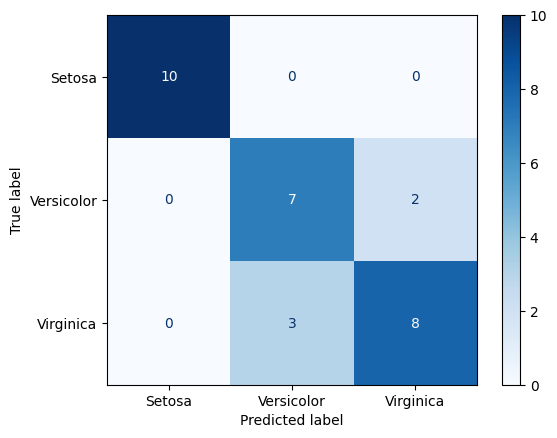

KNN Accuracy on Full Dataset: 1.00
KNN Accuracy on First Two Features: 0.83


In [ ]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)

# Use only the first two features of X
X_2d = X[:, :2]

# Split into train and test
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn.fit(X_train_2d, y_train_2d)

# Predict on test set
y_pred_2d = knn.predict(X_test_2d)

# Confusion matrix
cm_2d = confusion_matrix(y_test_2d, y_pred_2d)
disp_2d = ConfusionMatrixDisplay(confusion_matrix=cm_2d, display_labels=['Setosa', 'Versicolor', 'Virginica'])

# Display confusion matrix
disp_2d.plot(cmap='Blues')
plt.show()


# Compare the results with full dataset
accuracy_2d = knn.score(X_test_2d, y_test_2d)

print(f"KNN Accuracy on Full Dataset: {accuracy_full:.2f}")
print(f"KNN Accuracy on First Two Features: {accuracy_2d:.2f}")
